In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('IMDB Dataset.csv')

print(df.head())
print(df.info())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

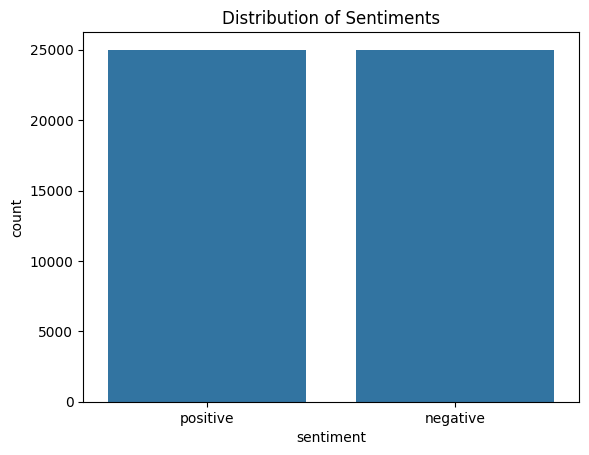

In [ ]:
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

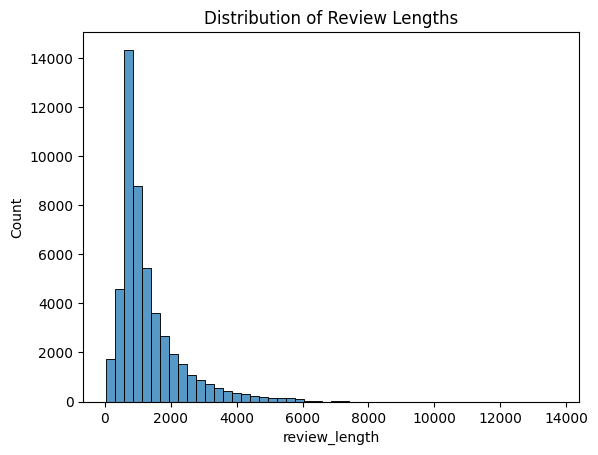

In [ ]:
df['review_length'] = df['review'].apply(len)
sns.histplot(df['review_length'], bins=50)
plt.title('Distribution of Review Lengths')
plt.show()

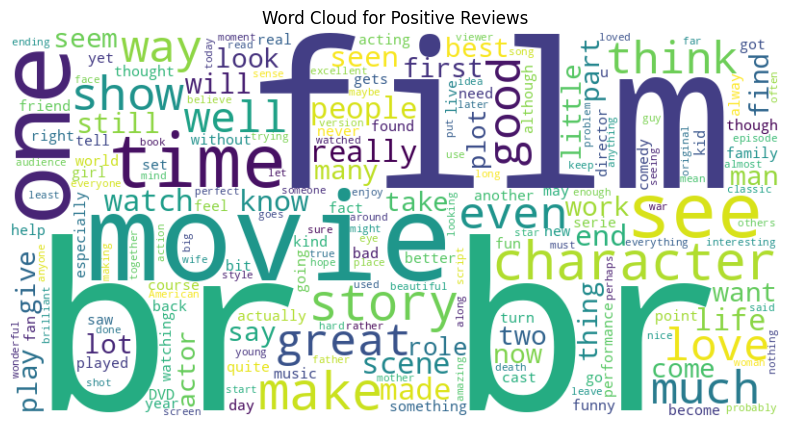

In [ ]:
positive_reviews = " ".join(df[df['sentiment'] == 'positive']['review'])
wordcloud_pos = WordCloud(width=800, height=400,
background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')       # for Lemmatizer
nltk.download('stopwords')     # for Stop words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
def clean_text(text):
 text = text.lower() # Lowercasing
 text = re.sub(r'<.*?>', '', text) # Remove HTML tags
 text = re.sub(r'[^a-z\s]', '', text) # Remove punctuation and numbers
 words = nltk.word_tokenize(text) # Tokenization
 words = [word for word in words if word not in stop_words] # Stop word removal
 words = [lemmatizer.lemmatize(word) for word in words] # Lemmatization
 return " ".join(words)

df['cleaned_review'] = df['review'].apply(clean_text)
print(df[['review', 'cleaned_review']].head())

                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one reviewer mentioned watching oz episode you...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
X = df['cleaned_review']
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0) # Convert sentiment to numerical
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# CountVectorizer
vectorizer_count = CountVectorizer(max_features=5000) # Limit features to 5000
X_train_count = vectorizer_count.fit_transform(X_train)
X_test_count = vectorizer_count.transform(X_test)

In [ ]:
# TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(max_features=5000) # Limit features to 5000
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)
print("Shape of X_train_count:", X_train_count.shape)
print("Shape of X_train_tfidf:", X_train_tfidf.shape)


Shape of X_train_count: (40000, 5000)
Shape of X_train_tfidf: (40000, 5000)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
models = {
 "Logistic Regression": LogisticRegression(max_iter=1000),
 "Multinomial Naive Bayes": MultinomialNB(),
 "Support Vector Machine": SVC()
}
results = {}

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, solver="saga"),
    "Multinomial Naive Bayes": MultinomialNB()
}


In [ ]:
# Small sample
X_train_small = X_train_tfidf[:5000]
y_train_small = y_train[:5000]
X_test_small = X_test_tfidf[:1000]
y_test_small = y_test[:1000]

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, solver="saga"),
    "Multinomial Naive Bayes": MultinomialNB()
}

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Training Traditional ML Models...")
for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Training Traditional ML Models...

--- Training Logistic Regression ---
Accuracy: 0.8848
Precision: 0.8851
Recall: 0.8847
F1 Score: 0.8848

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000


--- Training Multinomial Naive Bayes ---
Accuracy: 0.8489
Precision: 0.8489
Recall: 0.8489
F1 Score: 0.8489

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Example data (তুমি নিজের y_true, y_pred ব্যবহার করবে)
y_true = [0, 1, 0, 1, 0, 1, 1, 0]
y_pred = [0, 0, 0, 1, 0, 1, 1, 1]

# Generate classification report as dictionary
results = classification_report(y_true, y_pred, output_dict=True)

# Convert to DataFrame
results_df = pd.DataFrame(results).T

print("\n--- Model Performance Summary ---")
print(results_df)

# Sort by F1-Score (row অনুযায়ী)
print("\n--- Sorted by F1-Score ---")
print(results_df.sort_values(by='f1-score', ascending=False))



--- Model Performance Summary ---
              precision  recall  f1-score  support
0                  0.75    0.75      0.75     4.00
1                  0.75    0.75      0.75     4.00
accuracy           0.75    0.75      0.75     0.75
macro avg          0.75    0.75      0.75     8.00
weighted avg       0.75    0.75      0.75     8.00

--- Sorted by F1-Score ---
              precision  recall  f1-score  support
0                  0.75    0.75      0.75     4.00
1                  0.75    0.75      0.75     4.00
accuracy           0.75    0.75      0.75     0.75
macro avg          0.75    0.75      0.75     8.00
weighted avg       0.75    0.75      0.75     8.00


In [ ]:
report = classification_report(y_true, y_pred, output_dict=True)
print(report)

results_df = pd.DataFrame(report).T
print(results_df)

{'0': {'precision': 0.75, 'recall': 0.75, 'f1-score': 0.75, 'support': 4.0}, '1': {'precision': 0.75, 'recall': 0.75, 'f1-score': 0.75, 'support': 4.0}, 'accuracy': 0.75, 'macro avg': {'precision': 0.75, 'recall': 0.75, 'f1-score': 0.75, 'support': 8.0}, 'weighted avg': {'precision': 0.75, 'recall': 0.75, 'f1-score': 0.75, 'support': 8.0}}
              precision  recall  f1-score  support
0                  0.75    0.75      0.75     4.00
1                  0.75    0.75      0.75     4.00
accuracy           0.75    0.75      0.75     0.75
macro avg          0.75    0.75      0.75     8.00
weighted avg       0.75    0.75      0.75     8.00


In [ ]:
# Displaying the results in a DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print("\n--- Model Performance Summary ---")

# use 'f1-score' (exact name)
print(results_df.sort_values(by='f1-score', ascending=False))



--- Model Performance Summary ---
              precision  recall  f1-score  support
0                  0.75    0.75      0.75     4.00
1                  0.75    0.75      0.75     4.00
accuracy           0.75    0.75      0.75     0.75
macro avg          0.75    0.75      0.75     8.00
weighted avg       0.75    0.75      0.75     8.00


In [ ]:
print(results_df.columns.tolist())


['precision', 'recall', 'f1-score', 'support']


In [ ]:
import joblib

In [ ]:
# Choose the best performing model (e.g., Logistic Regression with TF-IDF)
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Save the model and vectorizer
joblib.dump(best_model, 'sentiment_model.pkl')
joblib.dump(vectorizer_tfidf, 'tfidf_vectorizer.pkl')

print("\nModel and Vectorizer saved successfully.")


Model and Vectorizer saved successfully.


In [ ]:
# Load them back (in a new session or script)
loaded_model = joblib.load('sentiment_model.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

In [ ]:
# Example prediction
new_reviews = [
 "This movie was absolutely fantastic! I loved every minute of it.",
 "What a terrible film. I wasted my time and money.",
 "It was okay, not great, not bad. Just very average."
]

In [ ]:
def predict_sentiment(reviews, model, vectorizer, clean_func):
 cleaned_reviews = [clean_func(review) for review in reviews]
 vectorized_reviews = vectorizer.transform(cleaned_reviews)
 predictions = model.predict(vectorized_reviews)
 sentiments = ['positive' if p == 1 else 'negative' for p in predictions]
 for i, review in enumerate(reviews):
  print(f"Review: '{review}'\nPredicted Sentiment: {sentiments[i]}\n")
print("\n--- Making Predictions on New Reviews ---")
predict_sentiment(new_reviews, loaded_model, loaded_vectorizer, clean_text)


--- Making Predictions on New Reviews ---
Review: 'This movie was absolutely fantastic! I loved every minute of it.'
Predicted Sentiment: positive

Review: 'What a terrible film. I wasted my time and money.'
Predicted Sentiment: negative

Review: 'It was okay, not great, not bad. Just very average.'
Predicted Sentiment: negative

